# WRF-Chem Results Evaluation

## Libraries

In [1]:
%matplotlib inline
import pandas as pd
import os, fnmatch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import wrf_sp_eval.data_preparation as dp
import wrf_sp_eval.qualar_py as qr
import wrf_sp_eval.model_stats as ms 


# Import Data

### Measured data in CETESB stations

In [2]:
stations = pd.read_csv('../PythonObsData/cetesb_station_2017_codes_qualr.csv',
                      encoding = "ISO-8859-1")

# Meteorological parameters observations
Dir = '../PythonObsData/data/SEP18/'

def readDat(files, path = '../PythonObsData/data/SEP18/',time_zone="America/Sao_Paulo"):
    Data = pd.DataFrame()
    for file in files:
        df = pd.read_csv(path + file)
        Data = pd.concat([Data,df])
    Data['station'] = [stations[stations.code == i].name.values[0] for i in Data.code]
    Data.loc[:,'date'] = pd.to_datetime(Data['date'], format='%Y-%m-%d %H:%M:%S')
    Data.rename(columns={'date':'local_date'}, inplace = True)
    Data.loc[:,'local_date']=Data['local_date'].dt.tz_localize(time_zone)
    return Data

f18 = fnmatch.filter(os.listdir(Dir), 'all_met*.csv')
metObs = readDat(f18, path = Dir)

# Air quality parameters
f18 = fnmatch.filter(os.listdir(Dir), 'all_photo*.csv')
aqObs = readDat(f18, path = Dir)


In [3]:
metObs

,local_date,tc,rh,sr,ws,wd,code,station
0,2018-09-01 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó
1,2018-09-01 01:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó
2,2018-09-01 02:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó
3,2018-09-01 03:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó
4,2018-09-01 04:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó
...,...,...,...,...,...,...,...,...
716,2018-09-30 20:00:00-03:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista
717,2018-09-30 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista
718,2018-09-30 22:00:00-03:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista
719,2018-09-30 23:00:00-03:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista


In [4]:
aqObs


,local_date,o3,no,no2,co,code,station
0,2018-09-01 00:00:00-03:00,NaN,NaN,NaN,NaN,236,S.Miguel Paulista
1,2018-09-01 01:00:00-03:00,NaN,NaN,NaN,NaN,236,S.Miguel Paulista
2,2018-09-01 02:00:00-03:00,NaN,NaN,NaN,NaN,236,S.Miguel Paulista
3,2018-09-01 03:00:00-03:00,NaN,NaN,NaN,NaN,236,S.Miguel Paulista
4,2018-09-01 04:00:00-03:00,NaN,NaN,NaN,NaN,236,S.Miguel Paulista
...,...,...,...,...,...,...,...
716,2018-09-30 20:00:00-03:00,45.0,NaN,NaN,NaN,113,Piracicaba
717,2018-09-30 21:00:00-03:00,46.0,NaN,NaN,NaN,113,Piracicaba
718,2018-09-30 22:00:00-03:00,33.0,NaN,NaN,NaN,113,Piracicaba
719,2018-09-30 23:00:00-03:00,20.0,NaN,NaN,NaN,113,Piracicaba


In [5]:
Obs = pd.merge(metObs, aqObs)
Obs.rename(columns={
    'tc':'tc_obs',
    'rh':'rh_obs',
    'sr':'sr_obs',
    'ws':'ws_obs',
    'wd':'wd_obs',
    'o3':'o3_obs',
    'no':'no_obs',
    'no2': 'no2_obs',
    'co':'co_obs'
    }, inplace = True)
Obs

,local_date,tc_obs,rh_obs,sr_obs,ws_obs,wd_obs,code,station,o3_obs,no_obs,no2_obs,co_obs
0,2018-09-01 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,NaN,NaN,NaN,NaN
1,2018-09-01 01:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,0.0,NaN,NaN,NaN
2,2018-09-01 02:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,0.0,NaN,NaN,NaN
3,2018-09-01 03:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,0.0,NaN,NaN,NaN
4,2018-09-01 04:00:00-03:00,NaN,NaN,NaN,NaN,NaN,96,N.Senhora do Ó,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49023,2018-09-30 20:00:00-03:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista,NaN,NaN,NaN,NaN
49024,2018-09-30 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista,NaN,NaN,NaN,NaN
49025,2018-09-30 22:00:00-03:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista,NaN,NaN,NaN,NaN
49026,2018-09-30 23:00:00-03:00,NaN,NaN,NaN,NaN,NaN,236,S.Miguel Paulista,NaN,NaN,NaN,NaN


### Output model data for CETESB stations

In [6]:
# Meteorological parameters
Dir = '../3_Validation/out/exp1/'
f18 = fnmatch.filter(os.listdir(Dir), '*_wrfoutFNL.csv')

def readMod(files, path = '../PythonObsData/data/SEP18/',time_zone="America/Sao_Paulo"):
    Data = pd.DataFrame()
    for file in files:
        df = pd.read_csv(path + file)
        Data = pd.concat([Data,df])
    Data['station'] = [stations[stations.code == i].name.values[0] for i in Data.code]
    Data.loc[:,'local_date'] = pd.to_datetime(Data['local_date'], format='%Y-%m-%d %H:%M:%S')
    #Data.loc[:,'local_date']=Data['local_date'].dt.tz_localize(time_zone)
    return Data

Mod = readMod(f18, path = Dir)
Mod.rename(columns={'name':'station'})
Mod = Mod[['local_date','code','station','tc','rh','ws','wd','o3','no','no2','co']]
Mod.head()

,local_date,code,station,tc,rh,ws,wd,o3,no,no2,co
0,2018-09-05 21:00:00-03:00,110,Jaú,17.118805,65.311140,7.119879,139.77872,52.169292,0.124874,0.191474,0.099841
1,2018-09-05 22:00:00-03:00,110,Jaú,15.831238,70.637375,7.626533,137.07823,47.903160,0.099959,0.153270,0.099286
2,2018-09-05 23:00:00-03:00,110,Jaú,14.952759,70.352580,7.450938,132.75008,45.553802,0.091697,0.140602,0.099983
3,2018-09-06 00:00:00-03:00,110,Jaú,14.215942,70.952780,7.690843,130.87686,44.797690,0.075660,0.116012,0.102309
4,2018-09-06 01:00:00-03:00,110,Jaú,13.707581,72.147440,7.497673,128.23387,43.718060,0.073232,0.112289,0.102831


In [7]:
Mod.station.unique()

array(['Jaú', 'S.Miguel Paulista', 'Cubatão-V.Parisi', 'Taboão da Serra',
       'N.Senhora do Ó', 'Diadema', 'Pirassununga-EM', 'Mooca', 'Tatuí',
       'Cid.Universitária-USP-Ipen', 'S.José Campos-Vista Verde',
       'São Caetano do Sul', 'Cerqueira César', 'Piracicaba', 'Mauá',
       'Parque D.Pedro II', 'Paulínia', 'S.André-Capuava', 'Osasco',
       'Cubatão-Vale do Mogi', 'Santos', 'Campinas-Taquaral',
       'S.José Campos', 'S.Bernardo-Centro', 'Campinas-V.União',
       'Interlagos', 'Grajaú-Parelheiros', 'Itaim Paulista', 'Limeira',
       'Jundiaí', 'Marg.Tietê-Pte Remédios', 'Pinheiros', 'Carapicuíba',
       'Pico do Jaraguá', 'Taubaté', 'Guarulhos', 'Mogi das Cruzes',
       'Americana', 'Guarulhos-Paço Municipal', 'Santa Gertrudes',
       'Campinas-Centro', 'S.José Campos-Jd.Satelite',
       'Santos-Ponta da Praia', 'Jacareí', 'Cambuci', 'Cubatão-Centro',
       'Ibirapuera', 'Guarulhos-Pimentas', 'Centro', 'S.André-Centro',
       'Congonhas', 'Guaratinguetá', 'Sant

## Statistical Evaluation

In [8]:
data = pd.merge(Obs, Mod)
data.dropna(inplace=True,axis=0)
obs_df = data[['local_date','code','station','tc_obs',
              'rh_obs','ws_obs','wd_obs','o3_obs','no_obs',
               'no2_obs','co_obs']]
obs_df = obs_df.rename(columns={'station':'name','tc_obs':'tc',
                       'rh_obs':'rh',
                       'ws_obs':'ws',
                       'wd_obs':'wd',
                       'o3_obs':'o3',
                       'no_obs':'no',
                       'no2_obs':'no2',
                       'co_obs':'co'
                      })
model_df = data[['local_date','code','station','tc',
              'rh','ws','wd','o3','no',
               'no2','co']]
model_df = model_df.rename(columns={'station':'name'})
obs_df.set_index('local_date',inplace=True)
obs_df['hour']=obs_df.index.hour
model_df.set_index('local_date',inplace=True)
model_df['hour']=model_df.index.hour

obs_df

,code,name,tc,rh,ws,wd,o3,no,no2,co,hour
local_date,,,,,,,,,,,
2018-09-05 21:00:00-03:00,263,Carapicuíba,12.0,85.0,2.3,170.0,19.0,2.0,39.0,0.4,21
2018-09-05 22:00:00-03:00,263,Carapicuíba,11.7,85.0,2.8,171.0,20.0,1.0,37.0,0.3,22
2018-09-05 23:00:00-03:00,263,Carapicuíba,11.3,86.0,1.8,149.0,17.0,1.0,38.0,0.4,23
2018-09-06 00:00:00-03:00,263,Carapicuíba,11.1,87.0,2.1,175.0,11.0,2.0,43.0,0.4,0
2018-09-06 02:00:00-03:00,263,Carapicuíba,10.6,88.0,1.7,141.0,26.0,0.0,26.0,0.3,2
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-13 17:00:00-03:00,72,Parque D.Pedro II,22.8,63.0,2.0,193.0,49.0,5.0,57.0,0.4,17
2018-09-13 18:00:00-03:00,72,Parque D.Pedro II,20.2,73.0,1.7,189.0,34.0,5.0,64.0,0.4,18
2018-09-13 19:00:00-03:00,72,Parque D.Pedro II,18.1,82.0,1.6,194.0,32.0,2.0,51.0,0.3,19


In [9]:
data.station.unique()

array(['Carapicuíba', 'S.José Campos-Jd.Satelite', 'Guarulhos-Pimentas',
       'Taubaté', 'Parque D.Pedro II'], dtype=object)

## Figures

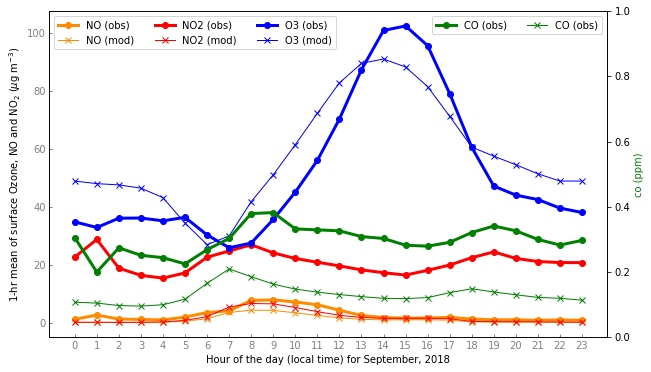

In [10]:
pols_ugm3={'no':'darkorange','no2':'r','o3':'b'}
pols_ppm={'co':'g'}
pols={**pols_ugm3,**pols_ppm}.keys()
obs = obs_df.groupby(['hour']).mean()[pols]
mod = model_df.groupby(['hour']).mean()[pols]

def chart(obs=obs,mod=mod, save = True, title = False, title_name = 'name',
          path='../4_Draft_Report/Dissertation/fig/pols_fnl.pdf'):
    fig= plt.figure(figsize=(10,6))
    ax1 = fig.gca()
    plt.xticks(np.arange(0,24,1))
    ax1.tick_params(axis="x", direction="in",length=3, width=1, colors='gray')
    ax1.tick_params(axis="y", direction="in",length=3, width=1, colors='gray')
    ax1.grid(False)
    for pol,col in pols_ugm3.items():
        ax1.plot(obs.index,obs[pol], color=col,
                 label=pol.upper()+' (obs)',lw=3, marker='o')
        ax1.plot(mod.index,mod[pol], color=col, 
                 label=pol.upper()+' (mod)',lw=1, marker='x')
        ax1.set_ylabel('1-hr mean of surface Ozone, NO and NO$_2$ ($\mu$g m$^{-3}$)')
        ax1.legend(loc='upper left', ncol = 3)
    for pol_2,col in pols_ppm.items():
        ax2 = ax1.twinx()
        ax2.yaxis.label.set_color(col)
        ax2.plot(obs.index,obs[pol_2], color=col, 
                 label= pol_2.upper()+' (obs)',lw=3,marker='o')
        ax2.plot(mod.index,mod[pol_2], color=col, 
                 label= pol_2.upper()+' (obs)',lw=1,marker='x')
        ax2.legend(loc='best', ncol = 3)
        ax2.set_ylim(0.0, 1.0)
        ax2.set_ylabel(pol_2+' (ppm)')
        ax1.set_xlabel('Hour of the day (local time) for '+
                       obs_df.index.strftime('%B, %Y').unique().values[0])
    if title:
        plt.title(title_name)
    else:
        pass
    if save:
        fig.savefig(path,bbox_inches='tight')
    else:
        pass
    

def Hourplot(obsData=obs_df, modData=model_df, title = False,
             pols_ugm3={'no':'darkorange','no2':'r','o3':'b'},
             pols_ppm={'co':'g'}, by_station=False, save = True, 
             path='../4_Draft_Report/Dissertation/fig/'):
    pols={**pols_ugm3,**pols_ppm}.keys()
    if by_station:
        for i in obsData.name.unique():
            obs = obsData[obsData.name==i].groupby(['hour']).mean()[pols]
            mod = modData[modData.name==i].groupby(['hour']).mean()[pols]
            chart(obs=obs, mod=mod, save = save, title = title,title_name = i,
                  path= path+"".join(e[0:2] for e in i.split())+'_pol.pdf')
            
    else:
        obsData['hour']=obsData.index.hour
        modData['hour']=modData.index.hour
        obs = obsData.groupby(['hour']).mean()[pols]
        mod = modData.groupby(['hour']).mean()[pols]
        chart(obs=obs,mod=mod, save = save, path = path+'mean_pol.pdf')
    
Hourplot(obsData=obs_df, modData=model_df,
         pols_ugm3={'no':'darkorange','no2':'r','o3':'b'},
         pols_ppm={'co':'g'}, by_station=False, 
         save = True, path = '../4_Draft_Report/Dissertation/fig/');


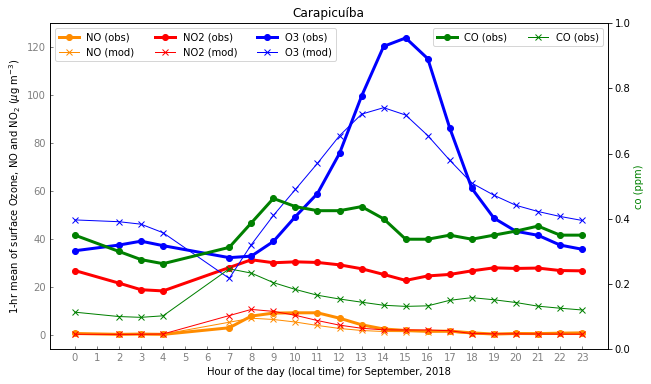

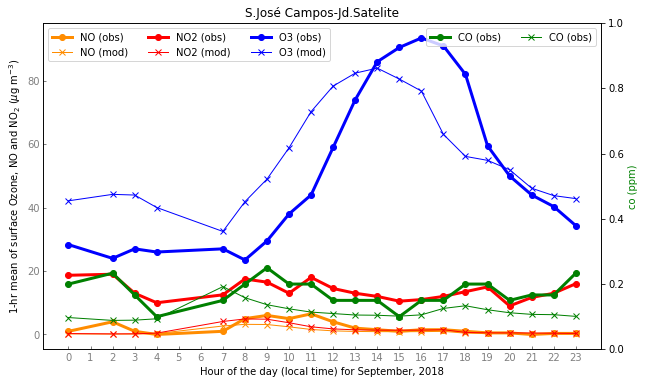

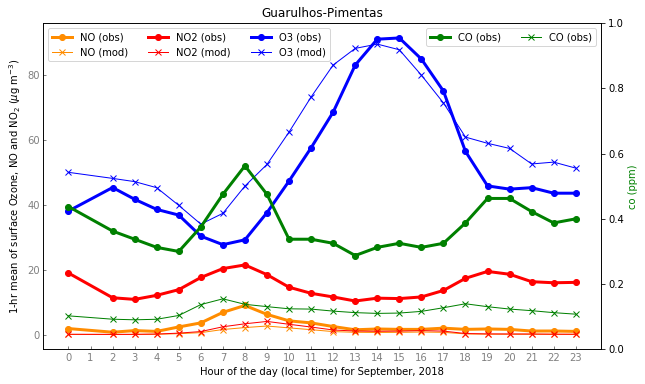

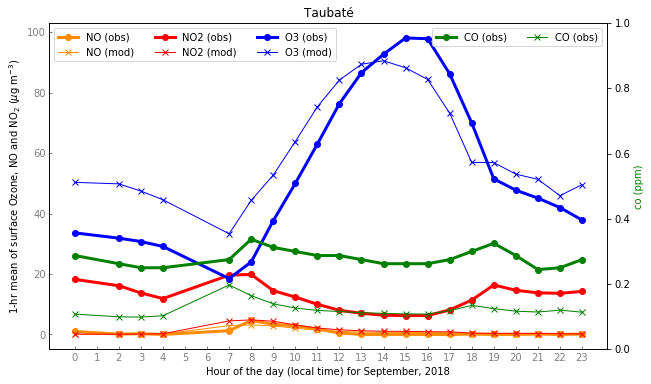

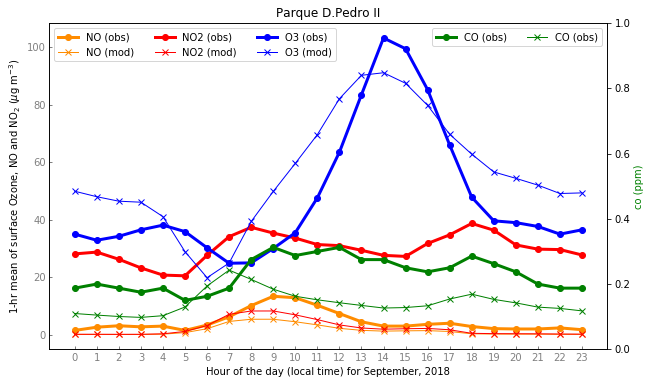

In [11]:
mpl.rcParams.update({'figure.max_open_warning': 0})
Hourplot(obsData=obs_df, 
         modData=model_df, 
         pols_ugm3={'no':'darkorange','no2':'r','o3':'b'},
         pols_ppm={'co':'g'}, 
         by_station=True,
         title = True,
         save = False,
         path='../4_Draft_Report/Dissertation/fig/')


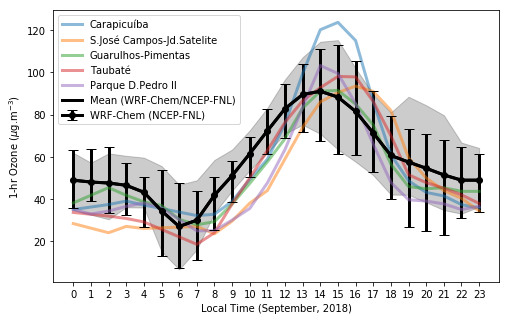

In [12]:
fig = plt.figure(figsize=(8,5))
for i in obs_df.name.unique():
    obs = obs_df[obs_df.name==i].groupby(['hour']).mean()[['co','no','no2','o3']]
    plt.plot(obs.index,obs.o3,  label=i,lw=3,
            alpha=0.5)
    
Mean = model_df.groupby(['hour']).mean()[['co','no','no2','o3']]
Max = model_df.groupby(['hour']).max()[['co','no','no2','o3']]
Min = model_df.groupby(['hour']).min()[['co','no','no2','o3']]

dy_up=Max-Mean
dy_down=Mean - Min
# Usar la desviación estándar

plt.errorbar(Mean.index, Mean.o3,yerr=[dy_up.o3,dy_down.o3],fmt='-o',color='black',
            capsize=5, lw=3,label = 'WRF-Chem (NCEP-FNL)')
plt.plot(obs.index, Mean.o3,'-k',lw=3,label = 'Mean (WRF-Chem/NCEP-FNL)')
plt.fill_between(obs.index, Max.o3, Min.o3, color='k', alpha=0.2)
plt.xticks(np.arange(0,24,1))
plt.ylabel('1-hr Ozone ($\mu$g.m$^{-3}$)')
plt.xlabel('Local Time (' +obs_df.index.strftime('%B, %Y').unique().values[0]+")")
plt.legend()
fig.savefig("../4_Draft_Report/Dissertation/fig/o3_fnl.pdf",bbox_inches='tight');